# Ratings Analysis

## Do higher rated movies earn more?

Here we will look at the success of movies as related to its viewer rating.

Ratings are taken from The Movie Database (TMDb). The ratings are user-submitted numbers between 0 and 10. Supplied in the dataset is the average for each movie, as well as the number of votes. There is also a popularity metric, which is related to the number of votes, but also taken from data such as number of unique page views and adding to favorites lists.

There are many different measures that could define success of a movie, but in this case we will look primarily at return on investment (ROI).

$$ROI = \frac{revenue - budget}{budget} * 100$$

A movie's budget could have an impact on it's viewer rating. In order to account for that, we can attempt to factor it out of our success metric. A movie's ROI should be more indepentent of it's budget than revenue or even profit.

### Accessing and Exploring the Data

Importing libraries I will need. Pandas to handle the large dataset, numpy to calculate means and medians, matplotlib and seaborn to create visualizations.

A quick look at the data reveals the columns and their types, as well as the general range of values we can expect from each.

We have 4161 movies in this dataset, ranging from 1915 releases to 2019.

The gross, profit, and ROI maxes are all two or three orders of magnitude above their means. This indicates the presence of far away outliers in our dataset, which will need to be factored in to our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 37 columns):
Unnamed: 0                4161 non-null int64
title                     4161 non-null object
original_title            4161 non-null object
year                      4161 non-null int64
month                     4161 non-null int64
day                       4161 non-null int64
release_date              4161 non-null object
production_budget         4161 non-null int64
domestic_gross            4161 non-null int64
worldwide_gross           4161 non-null int64
worldwide_profit(loss)    4161 non-null int64
roi                       4161 non-null float64
popularity                4161 non-null float64
vote_count                4161 non-null int64
vote_average              4161 non-null float64
original_language         4161 non-null object
genre_ids                 4161 non-null object
action                    4161 non-null bool
adventure                 4161 non-null bool
animation 

In [4]:
df.head()

,Unnamed: 0,title,original_title,year,month,day,release_date,production_budget,domestic_gross,worldwide_gross,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,overview
0,0,Avatar,Avatar,2009,12,10,2009-12-10,425000000,760507625,2776345279,...,False,False,False,False,True,False,False,False,False,"In the 22nd century, a paraplegic Marine is di..."
1,1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,5,14,2011-05-14,410600000,241063875,1045663875,...,False,False,False,False,False,False,False,False,False,Captain Jack Sparrow crosses paths with a woma...
2,2,Dark Phoenix,Dark Phoenix,2019,6,5,2019-06-05,350000000,42762350,149762350,...,False,False,False,False,True,False,False,False,False,The X-Men face their most formidable and power...
3,3,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,4,22,2015-04-22,330600000,459005868,1403013963,...,False,False,False,False,True,False,False,False,False,When Tony Stark tries to jumpstart a dormant p...
4,4,Avengers: Infinity War,Avengers: Infinity War,2018,4,25,2018-04-25,300000000,678815482,2048134200,...,False,False,False,False,True,False,False,False,False,As the Avengers and their allies have continue...


In [5]:
df.describe()

,Unnamed: 0,year,month,day,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),roi,popularity,vote_count,vote_average
count,4161.000000,4161.000000,4161.000000,4161.00000,4.161000e+03,4.161000e+03,4.161000e+03,4.161000e+03,4161.000000,4161.000000,4161.000000,4161.000000
mean,2107.661620,2002.932949,6.755107,15.53641,3.721401e+07,5.103652e+07,1.094411e+08,7.222709e+07,3.896101,18.540035,1910.231915,6.356789
std,1231.533645,13.066677,3.388593,8.55512,4.415907e+07,7.082456e+07,1.860755e+08,1.564184e+08,17.914282,16.552343,2938.558336,0.905343
min,0.000000,1915.000000,1.000000,1.00000,6.000000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,-0.999974,0.600000,0.000000,0.000000
25%,1044.000000,1999.000000,4.000000,8.00000,9.000000e+06,7.836393e+06,1.142709e+07,-1.118662e+06,-0.141982,9.738000,226.000000,5.900000
50%,2091.000000,2005.000000,7.000000,16.00000,2.200000e+07,2.769525e+07,4.248816e+07,1.800000e+07,1.064674,13.927000,824.000000,6.400000
75%,3154.000000,2012.000000,10.000000,23.00000,5.000000e+07,6.382657e+07,1.226038e+08,7.801734e+07,3.056154,21.214000,2273.000000,7.000000
max,4365.000000,2019.000000,12.000000,31.00000,4.250000e+08,7.605076e+08,2.776345e+09,2.351345e+09,430.517853,250.684000,27379.000000,10.000000


In [6]:
df['roi'] = df['roi'].map(lambda x: x*100)
# todo: move to data cleaning notebook

### Creating Visualizations

Using Seaborn and Matplotlib to create visualizations of the datat to draw conclusions from. The figures are then saved into a visualizations folder within the project folder.

The plot configuration settings that are often used are declared as variables beforehand, so they only need to be updated in one place.

In [7]:
palette = 'YlGnBu'
context = 'poster'
size1 = (20, 5)
size2 = (20, 10)
figpath = 'Visualizations/Ratings Analysis/'

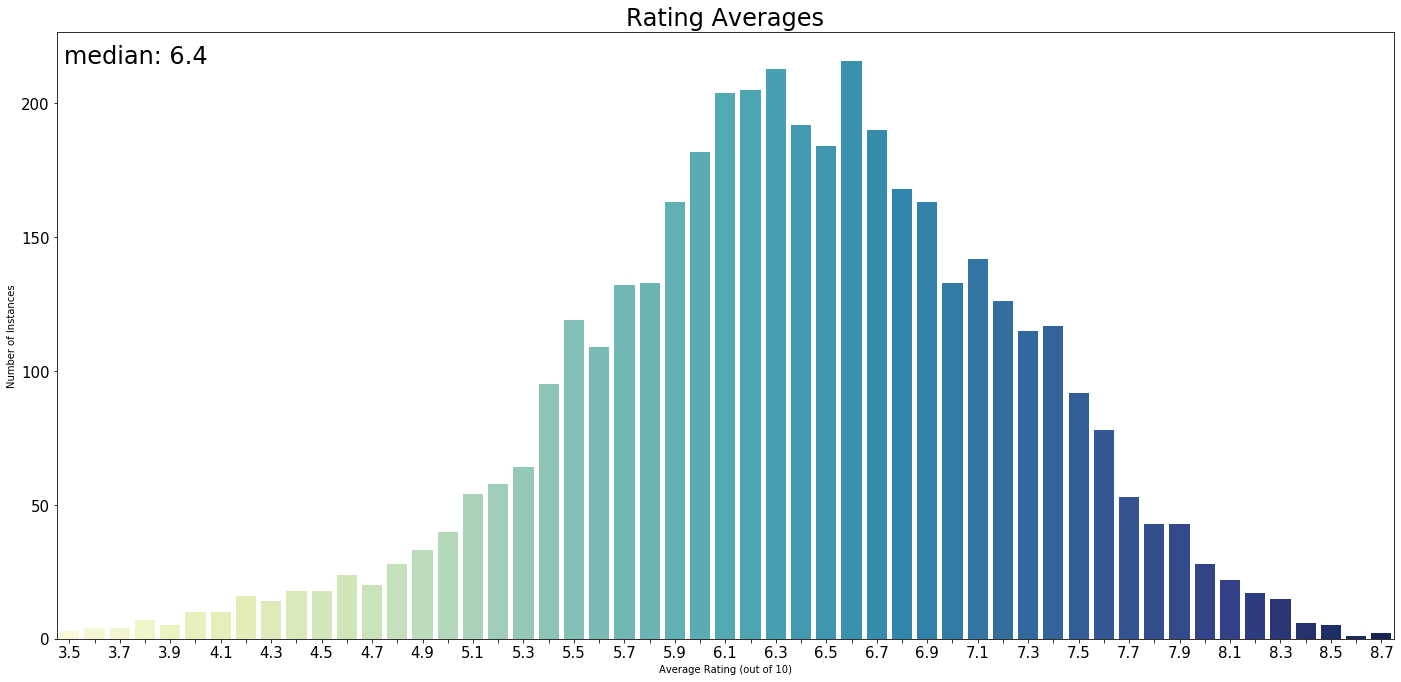

In [8]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.countplot(df.loc[(df['vote_average']>=3.5) & (df['vote_average']<=8.7)]['vote_average'], palette=palette, ax=ax)
vote_averages_plot.tick_params(labelsize=15)
vote_averages_plot.set(title='Rating Averages', xlabel='Average Rating (out of 10)', ylabel='Number of Instances')
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 2 != 0] # only show every other x-tick
ax.text(-.2, 215, s=f"median: {round(np.median(df['vote_average']),2)}")
plt.tight_layout()
plt.savefig(f'{figpath}Movie Ratings.png')
plt.show()

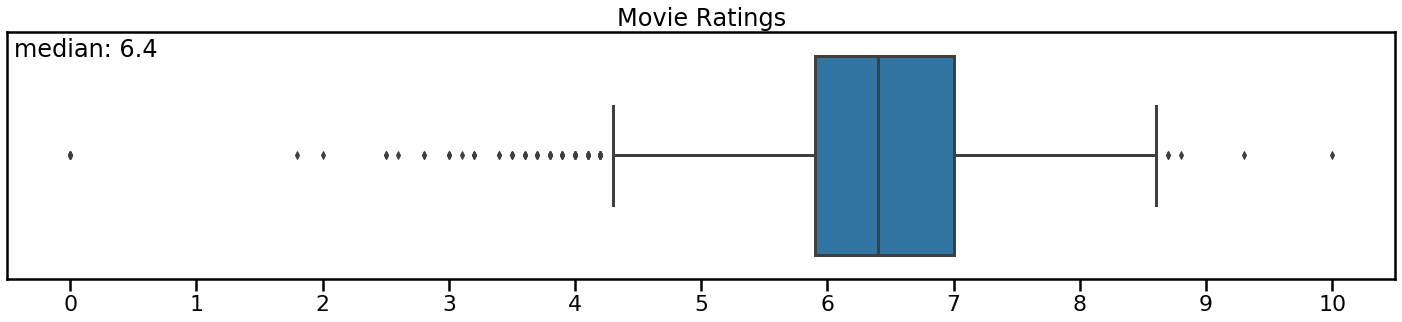

In [9]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size1)
ratings_plot = sns.boxplot(x='vote_average', data=df, ax=ax)
ax.text(-.45, -.4, s=f"median: {round(np.median(df['vote_average']),2)}")
ratings_plot.set(title='Movie Ratings', xlabel=None, xticks=range(0, 11, 1))
ratings_plot.tick_params(left=False)
plt.tight_layout()
plt.savefig(f'{figpath}Movie Ratings Boxplot.png')
plt.show()

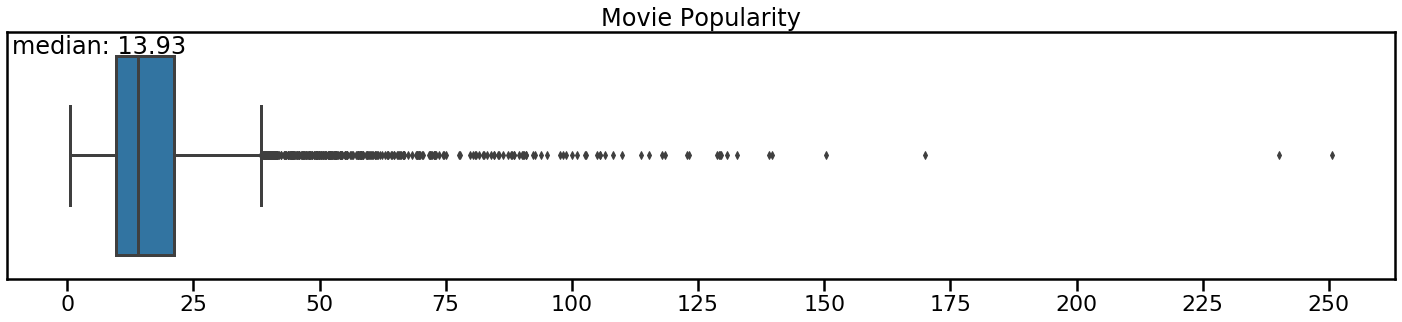

In [10]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size1)
popularity_plot = sns.boxplot(x='popularity', data=df, ax=ax)
ax.text(-11, -.413, s=f"median: {round(np.median(df['popularity']),2)}")
popularity_plot.set(title='Movie Popularity', xlabel=None, xticks=range(0, 251, 25))
popularity_plot.tick_params(left=False)
plt.tight_layout()
plt.savefig(f'{figpath}Movie Popularity Boxplot.png')
plt.show()

As mentioned, this data if affected by outliers. So, we can create a subset of our data without outliers.

We will define an outlier as those above this value:

$Q3 + (1.5 * (Q3 - Q1))$

where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).

In [11]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

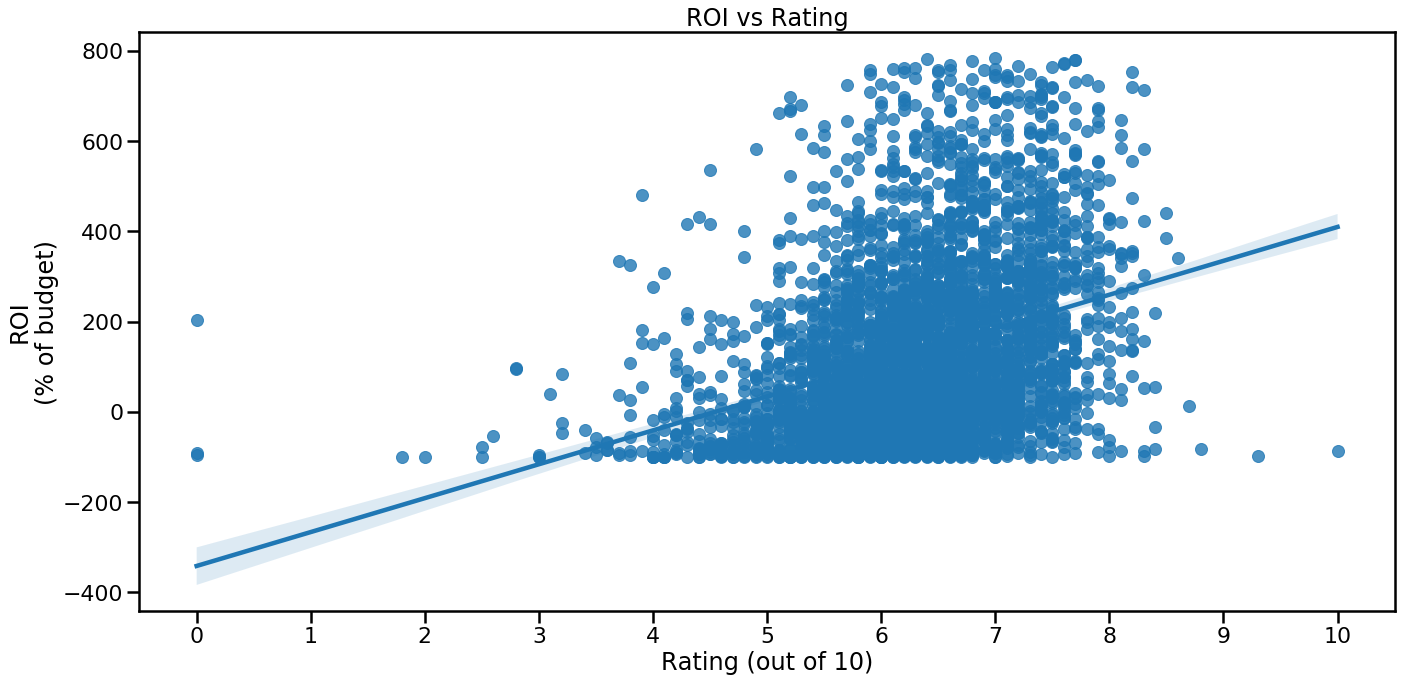

In [12]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.regplot(x='vote_average', y='roi', data=remove_outliers(df, 'roi'), ax=ax)
vote_averages_plot.set(title='ROI vs Rating', xlabel='Rating (out of 10)', ylabel='ROI\n(% of budget)', xticks=range(0, 11, 1))
plt.tight_layout()
plt.savefig(f'{figpath}ROI vs Rating.png')
plt.show()

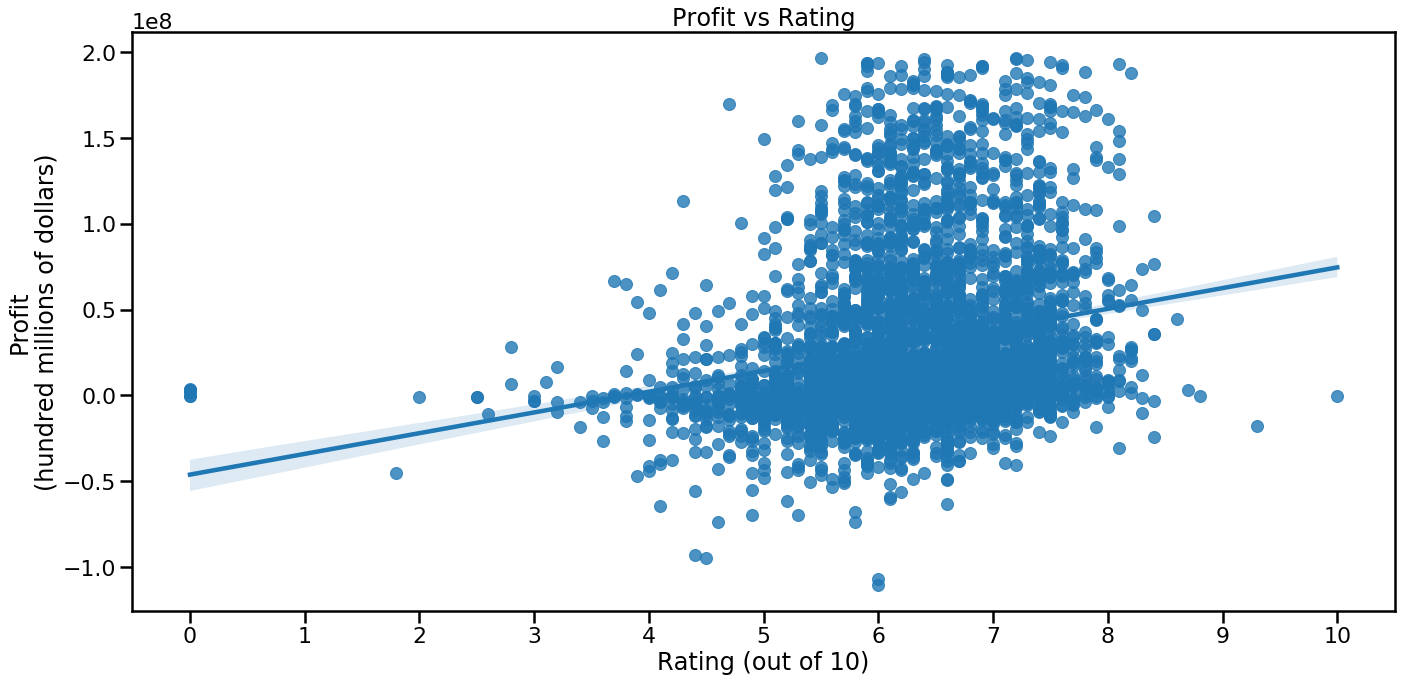

In [13]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.regplot(x='vote_average', y='worldwide_profit(loss)', data=remove_outliers(df, 'worldwide_profit(loss)'), ax=ax)
vote_averages_plot.set(title='Profit vs Rating', xlabel='Rating (out of 10)', ylabel='Profit\n(hundred millions of dollars)', xticks=range(0, 11, 1))
plt.tight_layout()
plt.savefig(f'{figpath}Profit vs Rating.png')
plt.show()

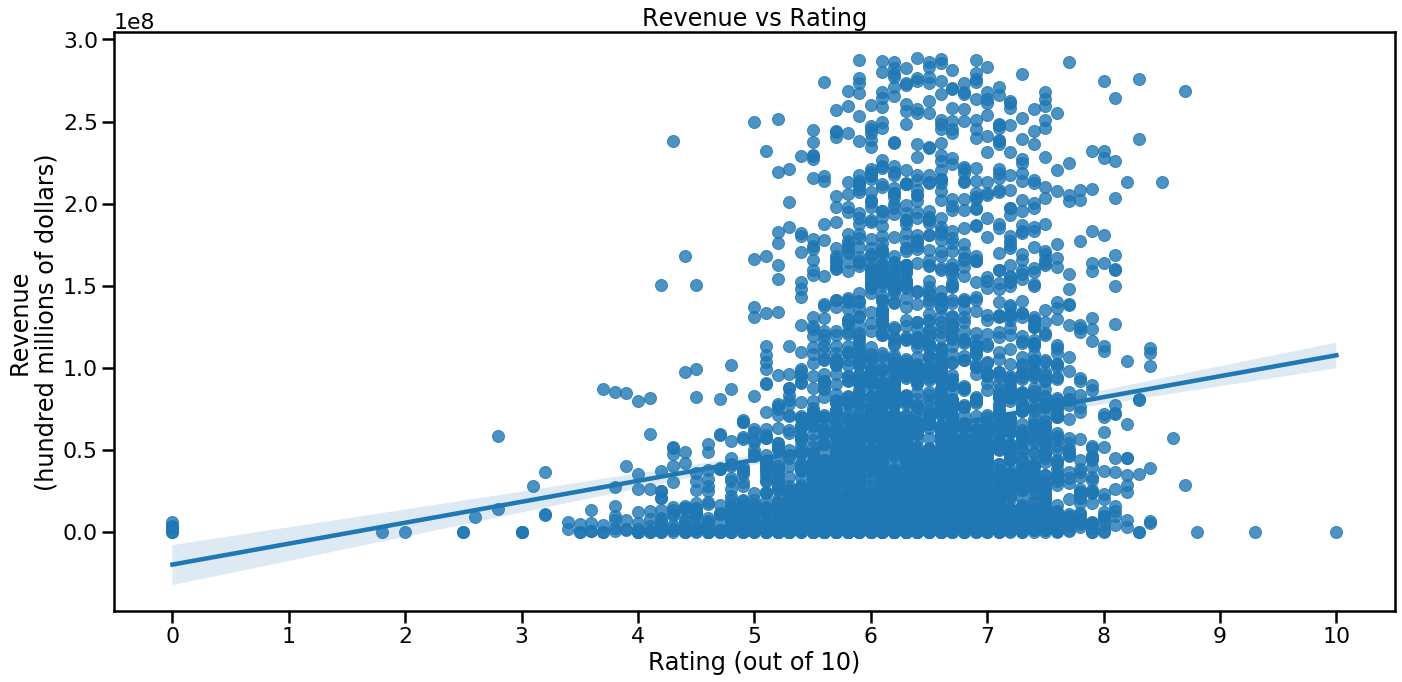

In [14]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.regplot(x='vote_average', y='worldwide_gross', data=remove_outliers(df, 'worldwide_gross'), ax=ax)
vote_averages_plot.set(title='Revenue vs Rating', xlabel='Rating (out of 10)', ylabel='Revenue\n(hundred millions of dollars)', xticks=range(0, 11, 1))
plt.tight_layout()
plt.savefig(f'{figpath}Revenue vs Rating.png')
plt.show()
# todo: turn revenue into millions of dollars (x100), remove '1e8' in top left

We mentioned that revenue seemed the best measure of success in this instance, but we displayed data for our other metrics anyways, just to see if there was any interesting relationship.

As mentioned, this data mitigates the affect of outliers. But what if we want to look only at outliers? After all, a movie studio would surely want to create a movie that vastly overperforms compared to other movies. In order to find out, we create a subset of the dataframe that only contains the high outliers, and visualize it.

In [15]:
def get_high_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>(q3+(1.5*iqr)))]

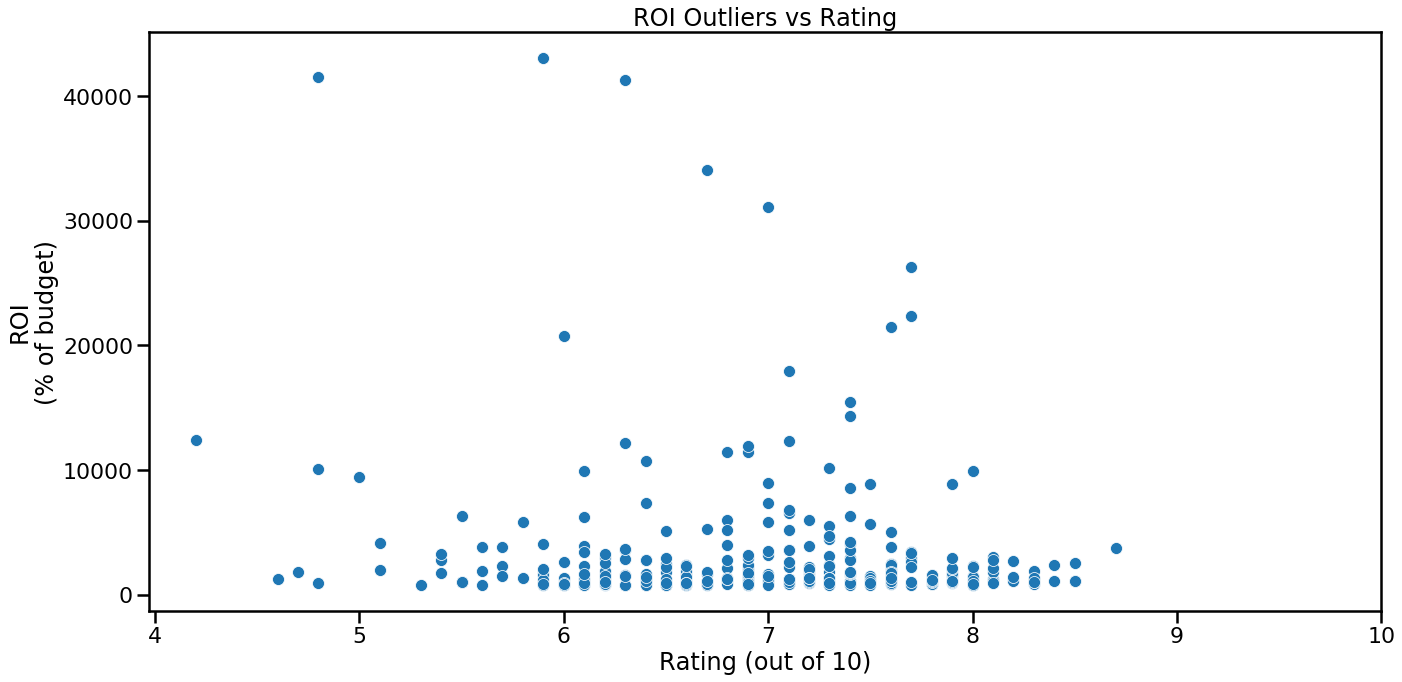

In [16]:
high_outliers_df = get_high_outliers(df, 'roi')
high_outliers_df = high_outliers_df[high_outliers_df['vote_average']>1] # remove low vote average outliers
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.scatterplot(x='vote_average', y='roi', data=high_outliers_df, ax=ax)
vote_averages_plot.set(title='ROI Outliers vs Rating', xlabel='Rating (out of 10)', ylabel='ROI\n(% of budget)', xticks=range(4, 11, 1))
plt.tight_layout()
plt.savefig(f'{figpath}ROI Outliers vs Rating.png')
plt.show()

All this data has been in regards to a movie's rating, but what about it's popularity? Will that metric give us any new insights?

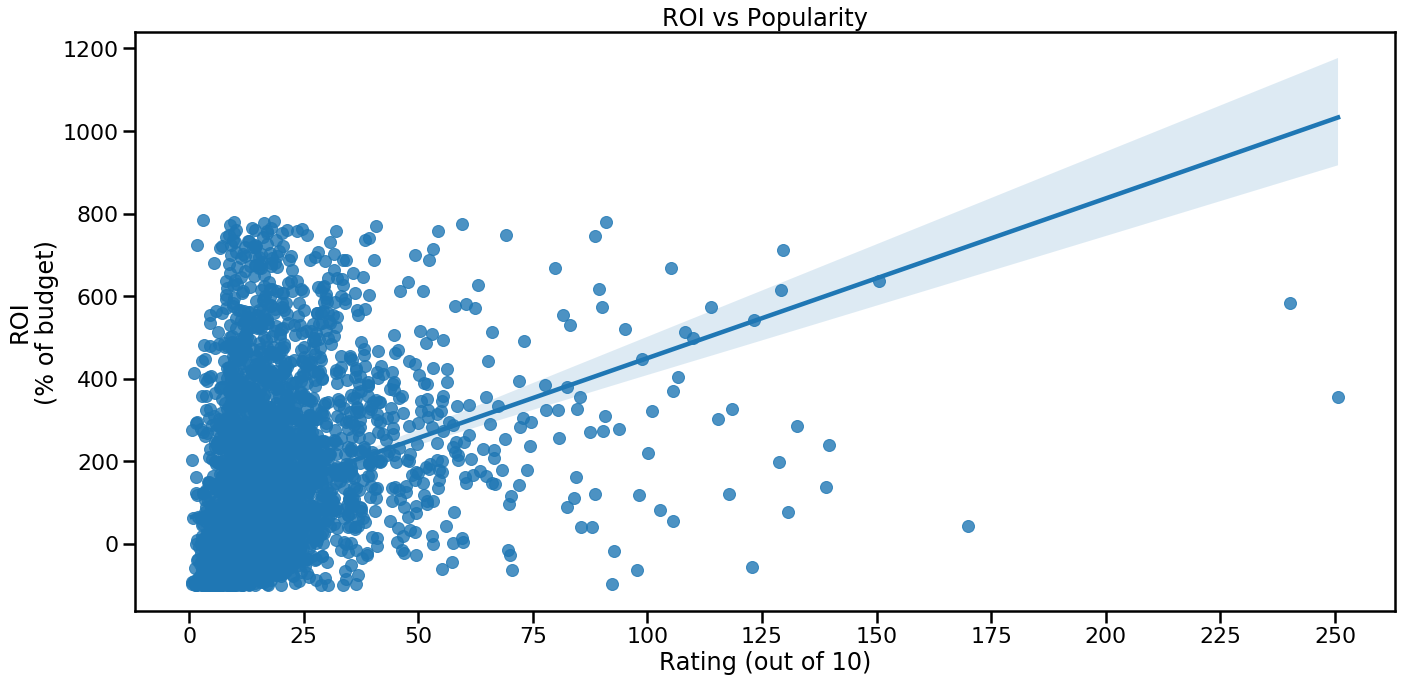

In [17]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size2)
vote_averages_plot = sns.regplot(x='popularity', y='roi', data=remove_outliers(df, 'roi'), ax=ax)
vote_averages_plot.set(title='ROI vs Popularity', xlabel='Rating (out of 10)', ylabel='ROI\n(% of budget)', xticks=range(0, 251, 25))
plt.tight_layout()
plt.savefig(f'{figpath}ROI vs Popularity.png')
plt.show()

### Conclusions

- The median rating is 6.4, while the mean is 6.36
- Not many outliers in ratings, as it is already an averaged value

- ROI does have a positive correlation with rating
- The relationship is not very strong: as long as a movie is at least around average, other factors influence it’s ROI more

- There seems to be little to no relationship between a overperforming movie’s rating and it’s ROI
- The behavior of overperforming movies may be harder to predict than standard ones

- TMDb's popularity score is not a useful metric by which to draw conclusions

### Restrictions and Future Considerations

- Many of these movies are from a long time ago, and may not be representative of current trends
- Ratings data is only taken from TMDb: with more time, it should be possible to gather a wider range of ratings from different sources
- Comparing these results to the same results but for critic's ratings could lead to some intersting findings